In [33]:
import pandas as pd
import os 
import shutil
import json
import time 
from datetime import timedelta
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image

In [34]:
start = time.time()
count = 0
df_all = pd.DataFrame() 
data_root = '/data/transfg/2_55_experiment/make_data/12월2주차'
count = 0
json_file_list = os.listdir(f'{data_root}/라벨링데이터')
for l in tqdm(json_file_list):
    try:
        path = os.path.join(f'{data_root}/라벨링데이터/{l}')
        with open(path,'r', encoding="UTF-8") as dc:
            data = json.load(dc) 
            df = pd.DataFrame(data['Learning Data Info']['annotations']) 
            df['path'] = data['Learning Data Info']['path']  
            df['json_data_id'] = data['Learning Data Info']['json_data_id']
            df_all = df_all.append(df)
            count +=1 
    except:
        print(os.path.join(f'{data_root}/라벨링데이터/{l}'))
end = time.time() 
print("Time elapsed: ", timedelta(seconds=end-start))
count

100%|██████████| 34145/34145 [02:37<00:00, 216.50it/s]

Time elapsed:  0:02:37.738895


34145

In [35]:
df_all = df_all.reset_index(drop=True)

In [36]:
df_all['model_id'].value_counts()

Unknown              9588
셀토스_셀토스(2019)        5557
봉고_봉고 Ⅲ(Unknown)     4087
포터_2(HR)(Unknown)    2562
라보_뉴(2008)           2443
                     ... 
무쏘_뉴 무쏘(1998)           1
베리타스_베리타스(2008)         1
다이너스티_다이너스티(1996)       1
체어맨_체어맨(1997)           1
윈스톰_맥스(2008)            1
Name: model_id, Length: 406, dtype: int64

In [37]:
# 언노운 제외
#unknown = df_all[df_all['model_id'] == 'Unknown']
df_all = df_all[df_all['model_id'] != 'Unknown']

In [38]:
#df_all = df_all.append(unknown.sample(8000))

In [39]:
df_all['json_data_id'] = df_all['json_data_id']+'.jpg'

In [40]:
def edit_coord(x):
    x[2] = x[0]+x[2] 
    x[3] = x[1]+x[3]
    return x

In [41]:
df_all['coord'] = df_all['coord'].apply(lambda x: edit_coord(x))

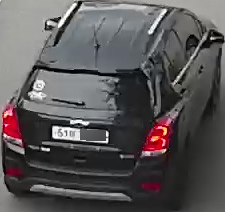

In [42]:
#for i in range(20):
image1 = Image.open(os.path.join(data_root,'원천데이터',df_all.iloc[9]['json_data_id']))
image2 = image1.crop(df_all.iloc[9]['coord'])
image2
#    display(image2)

In [43]:
unique_model_list = df_all.drop_duplicates(['brand_id','model_id'])[['brand_id','model_id']]
unique_model_list.head()

,brand_id,model_id
0,현대,그랜저_더 뉴 IG(2019)
2,기아,쏘렌토_R(2009)
3,현대,포터_2(HR)(Unknown)
5,기아,스포티지_R(2010)
6,현대,싼타페_DM(2012)


In [44]:
ouput_path = '/data/transfg/2_55_experiment/datasets/custom'

In [45]:
import os

def makedirs(path):
    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except OSError:
        print("Error: Failed to create the directory.")

In [46]:
start = time.time()
count = 0
for _,i in tqdm(df_all.iterrows()):
    try:
        count +=1
        image1 = Image.open(os.path.join(f'{data_root}/원천데이터',i['json_data_id']))
        image2 = image1.crop(i['coord'])
        folder_path = os.path.join(ouput_path,i['brand_id']+'#'+i['model_id'])
        makedirs(os.path.join(ouput_path,folder_path))
        image2.save(os.path.join(ouput_path,folder_path,i['json_data_id'].split('/')[-1]),'jpeg')
    except:
        print(os.path.join(f'{data_root}/원천데이터',i['json_data_id']))

end = time.time() 
print("Time elapsed: ", timedelta(seconds=end-start))

59809it [39:53, 24.99it/s]

Time elapsed:  0:39:53.600508


In [47]:
df_duplicated = df_all[df_all.duplicated(['brand_id','model_id','path','json_data_id'],keep='last')]

In [48]:
start = time.time()
count = 0
for _,i in tqdm(df_duplicated.iterrows()):
    try:
        count +=1
        image1 = Image.open(os.path.join(f'{data_root}/원천데이터',i['json_data_id']))
        image2 = image1.crop(i['coord'])
        folder_path = os.path.join(ouput_path,i['brand_id']+'#'+i['model_id'])
        makedirs(os.path.join(ouput_path,folder_path))
        image2.save(os.path.join(ouput_path,folder_path,i['json_data_id'].split('/')[-1].split('.jpg')[0]+'_add.jpg'),'jpeg')
    except:
        print(os.path.join(f'{data_root}/원천데이터',i['json_data_id']))

end = time.time() 
print("Time elapsed: ", timedelta(seconds=end-start))

615it [00:30, 20.05it/s]

Time elapsed:  0:00:30.673823
